**кластеризатор ФОРЭЛ**


Евгений Борисов borisov.e@solarl.ru

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import random

from time import time
from sklearn.datasets import make_blobs

In [2]:
def get_seed(): t = time() ; return int(((t%1)/(t//1))*1e11)

---

In [3]:
n_samples = 500
n_clst = 3 # количество кластеров

X,_ = make_blobs( 
        n_samples=n_samples,
        centers=n_clst,  
        random_state=get_seed(),
#         cluster_std=[1.0, 2.5, 0.5]
    )

In [4]:
# X = np.vstack([ 
#       np.loadtxt('../data/800_2b/points_1.txt'), 
#       np.loadtxt('../data/800_2b/points_2.txt') 
#     ])

In [5]:
# X = np.loadtxt('../data/360_1/points_1.txt')

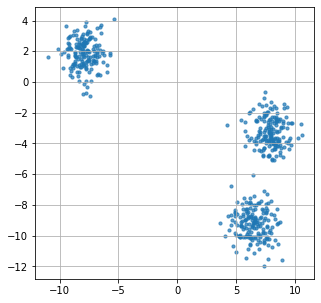

In [6]:
plt.figure(figsize=(5,5))
plt.scatter( x=X[:,0], y=X[:,1], s=10, alpha=0.7 )
plt.grid()
# plt.savefig('res-forel-1.png')
plt.show()

---

In [7]:
# import random
# random.choice([1,2,3,4,5,6])

In [8]:
def make_cluster( X, K, max_rad, max_iter=1000, delta=1e-32):   
    # выбираем случайную точку из не обработанных
    xc = X[ random.choice(K),:].reshape(1,X.shape[1])
    
    # формируем кластер и ищем его центроид
    for j in range(max_iter):
        # расстояния от точки xc до всех точек кластера K
        R = euclidean_distances(xc,X[K,:]).flatten() 
        
        # формируем кластер радиуса max_rad вокруг xc
        K = [ ki for i,ki in enumerate(K) if R[i]<max_rad ]
        
        xc_old = xc # сохраняем старое значение центра
        
        # пересчитываем центроид
        xc = X[K,:].mean(axis=0).reshape(1,X.shape[1]) 
        
        # если центроид не сдвинулся то завершаем цикл
        if np.square(xc_old-xc).sum() < delta: break
            
    return K,xc

In [9]:
def forel(X,max_rad, max_clust=1000):
    clst = []
    clst_cent = []

    U = list(range(X.shape[0])) # список номеров необработаных точек

    for i in range(max_clust):

        # формируем кластер из точек U радиуса max_rad
        K,xc = make_cluster(X,U,max_rad)

        # сохраняем кластер и его центроид     
        clst.append(K)
        clst_cent.append(xc)

        # удаляем обработанные точки из списка
        U = list(set(U)-set(K))

        print(len(U))

        # если нет больше неразмеченных точек
        if len(U) < 1: break # то завершаем работу
        # ... иначе формируем следующий кластер
        
    return clst, clst_cent

In [10]:
max_rad = euclidean_distances(X).max()/5.0 # размер кластера
clst, clst_cent = forel(X,max_rad)

332
166
0


In [11]:
len(clst)

3

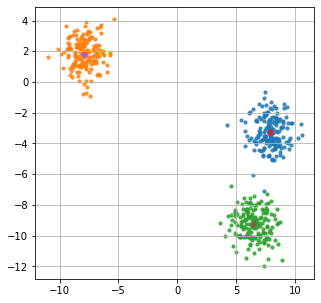

In [12]:
plt.figure(figsize=(5,5))
for c in clst: plt.scatter( x=X[c,0], y=X[c,1], s=10, alpha=0.8 )
for x in clst_cent: plt.scatter( x=x[0,0], y=x[0,1], s=30, alpha=0.8 )

plt.grid()
# plt.savefig('res-forel-2.png')

plt.show()

---

In [13]:
# U = list(range(X.shape[0])) # список номеров необработаных точек
# max_rad = euclidean_distances(X).max()/15.0
# len(U),max_rad

In [14]:
# # выбираем случайную точку из не обработанных
# c = random.choice(U)
# xc = X[c,:].reshape(1,X.shape[1])
# K = U

In [15]:
# # формируем кластер и ищем его центроид

# # расстояния от точки xc до всех точек кластера K
# R = euclidean_distances(xc,X[K,:]).flatten() 

# # формируем кластер радиуса max_rad вокруг xc
# K = [ ki for i,ki in enumerate(K) if R[i]<max_rad ]

# xc_old = xc # сохраняем старое значение центра

# # пересчитываем центроид
# xc = X[K,:].mean(axis=0).reshape(1,X.shape[1]) 

# # если центроид не сдвинулся то завершаем цикл
# print(np.square(xc_old-xc).sum())

In [16]:
# # удаляем обработанные точки из списка
# U = list(set(U)-set(K))
# print(len(U))


In [17]:
# len(K),xc